# Hypothesis Testing

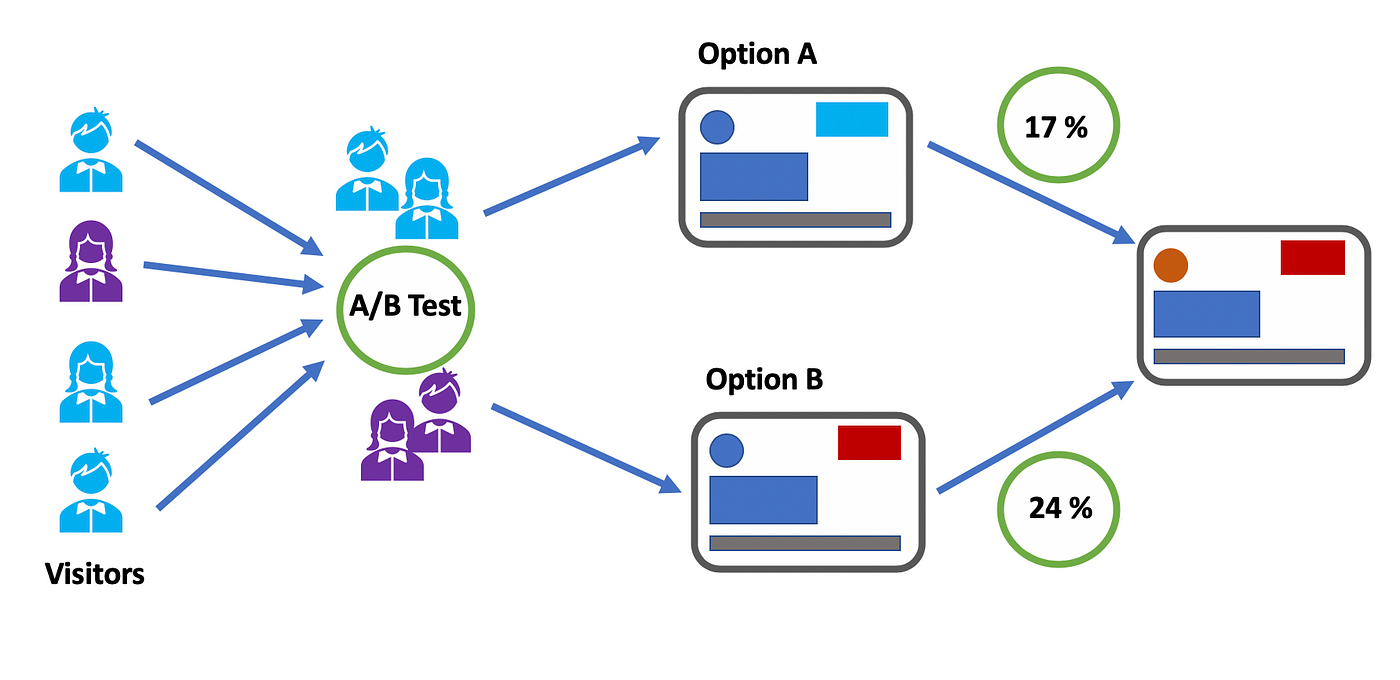

the dataset is based on the performance of two themes on a website. Our task is to find which theme performs better using Hypothesis Testing

In [3]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv("website_ab_test.csv")
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


### Steps for Hypothesis testing


1.Define Null (H0) and Alternative Hypothesis (H1 or Ha).

2.Gather the necessary data required for the hypothesis test.

3.Choose the Significance Level (α), which is the probability of rejecting the null hypothesis when it is true.

4.Select the appropriate statistical tests. Examples include t-tests for comparing means, chi-square tests for categorical data, and ANOVA for comparing means across more than two groups.

5.Perform the chosen statistical test on your data.

6.Determine the p-value and interpret the results of your statistical tests.

In [6]:
df.shape

(1000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [8]:
df.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


Click Through Rate: Ranges from about 0.01 to 0.50 with a mean of approximately 0.26.

Conversion Rate: Also ranges from about 0.01 to 0.50 with a mean close to the Click Through Rate, approximately 0.25.

Bounce Rate: Varies between 0.20 and 0.80, with a mean around 0.51.

Scroll Depth: Shows a spread from 20.01 to nearly 80, with a mean of 50.32.

Age: The age of users ranges from 18 to 65 years, with a mean age of about 41.5 years.

Session Duration: This varies widely from 38 seconds to nearly 1800 seconds (30 minutes), with a mean session duration of approximately 925 seconds (about 15 minutes).

### grouping data by theme and calculating mean values for the metrics

In [15]:
theme_performance = df.groupby('Theme')[['Click Through Rate','Conversion Rate','Bounce Rate','Scroll_Depth','Age','Session_Duration']].mean()

# sorting the data by conversion rate for a better comparison
theme_performance_sorted = theme_performance.sort_values(by='Conversion Rate', ascending=False)
theme_performance_sorted

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
Theme,,,,,,
Light Theme,0.247109,0.255459,0.499035,50.735232,41.734568,930.833333
Dark Theme,0.264501,0.251282,0.512115,49.926404,41.332685,919.482490


From these insights, it appears that the Light Theme slightly outperforms the Dark Theme in terms of Conversion Rate, Bounce Rate, Scroll Depth, and Session Duration, while the Dark Theme leads in Click Through Rate. However, the differences are relatively minor across all metrics.

### Starting Hypothesis test

We’ll use a significance level (alpha) of 0.05 for our hypothesis testing. It means we’ll consider a result statistically significant if the p-value from our test is less than 0.05.

#### Let’s start with hypothesis testing based on the Conversion Rate between the Light Theme and Dark Theme. Our hypotheses are as follows:

Null Hypothesis (H0​): There is no difference in Conversion Rates between the Light Theme and Dark Theme.

Alternative Hypothesis (Ha​): There is a difference in Conversion Rates between the Light Theme and Dark Theme.

We’ll use a two-sample t-test to compare the means of the two independent samples

In [16]:
# extracting conversion rates for both themes
conversion_rates_light = df[df['Theme'] == 'Light Theme']['Conversion Rate']
conversion_rates_dark = df[df['Theme'] == 'Dark Theme']['Conversion Rate']

# performing a two-sample t-test
t_stat, p_value = ttest_ind(conversion_rates_light, conversion_rates_dark, equal_var=False)

t_stat, p_value

(0.4748494462782632, 0.6349982678451778)

The result of the two-sample t-test gives a p-value of approximately 0.635. Since this p-value is much greater than our significance level of 0.05, we do not have enough evidence to reject the null hypothesis. Therefore, we conclude that there is no statistically significant difference in Conversion Rates between the Light Theme and Dark Theme based on the data provided

#### let’s conduct hypothesis testing based on the Click Through Rate (CTR)

Null Hypothesis (H0​): There is no difference in Click Through Rates between the Light Theme and Dark Theme.

Alternative Hypothesis (Ha​): There is a difference in Click Rates between the Light Theme and Dark Theme.

In [17]:
# extracting click through rates for both themes
ctr_light = df[df['Theme'] == 'Light Theme']['Click Through Rate']
ctr_dark = df[df['Theme'] == 'Dark Theme']['Click Through Rate']

# performing a two-sample t-test
t_stat_ctr, p_value_ctr = ttest_ind(ctr_light, ctr_dark, equal_var=False)

t_stat_ctr, p_value_ctr

(-1.9781708664172253, 0.04818435371010704)

The two-sample t-test for the Click Through Rate (CTR) between the Light Theme and Dark Theme yields a p-value of approximately 0.048. This p-value is slightly below our significance level of 0.05, indicating that there is a statistically significant difference in Click Through Rates between the Light Theme and Dark Theme, with the Dark Theme likely having a higher CTR given the direction of the test statistic.

#### Hypothesis Testing based on two other metrics: bounce rate and scroll depth

In [19]:
# extracting bounce rates for both themes
bounce_rates_light = df[df['Theme'] == 'Light Theme']['Bounce Rate']
bounce_rates_dark = df[df['Theme'] == 'Dark Theme']['Bounce Rate']

# performing a two-sample t-test for bounce rate
t_stat_bounce, p_value_bounce = ttest_ind(bounce_rates_light, bounce_rates_dark, equal_var=False)

# extracting scroll depths for both themes
scroll_depth_light = df[df['Theme'] == 'Light Theme']['Scroll_Depth']
scroll_depth_dark = df[df['Theme'] == 'Dark Theme']['Scroll_Depth']

# performing a two-sample t-test for scroll depth
t_stat_scroll, p_value_scroll = ttest_ind(scroll_depth_light, scroll_depth_dark, equal_var=False)

# creating a table for comparison
comparison_table = pd.DataFrame({
    'Metric': ['Click Through Rate', 'Conversion Rate', 'Bounce Rate', 'Scroll Depth'],
    'T-Statistic': [t_stat_ctr, t_stat, t_stat_bounce, t_stat_scroll],
    'P-Value': [p_value_ctr, p_value, p_value_bounce, p_value_scroll]
})
comparison_table

,Metric,T-Statistic,P-Value
0,Click Through Rate,-1.978171,0.048184
1,Conversion Rate,0.474849,0.634998
2,Bounce Rate,-1.201888,0.229692
3,Scroll Depth,0.756228,0.449692


### Summary

In summary, while the two themes perform similarly across most metrics, the Dark Theme has a slight edge in terms of engaging users to click through. For other key performance indicators like Conversion Rate, Bounce Rate, and Scroll Depth, the choice between a Light Theme and a Dark Theme does not significantly affect user behaviour according to the data provided